In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import preprocessing as keras_preprocessing
from tensorflow.keras.preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [9]:
pothole_training = "C:/Users/alans/OneDrive/Desktop/Sem6/ECE3502/J component/kaggle_dataset"
training_datagen = ImageDataGenerator(rescale = 1./255, horizontal_flip=True, rotation_range=30, height_shift_range=0.2, fill_mode='nearest')

pothole_validation = "C:/Users/alans/OneDrive/Desktop/Sem6/ECE3502/J component/kaggle_dataset"
validation_datagen = ImageDataGenerator(rescale = 1./255)

pothole_train_generator = training_datagen.flow_from_directory(pothole_training,target_size=(224,224),class_mode='categorical',batch_size = 64)

pothole_validation_generator = validation_datagen.flow_from_directory(pothole_validation, target_size=(224,224), class_mode='categorical', batch_size= 16)


Found 681 images belonging to 2 classes.
Found 681 images belonging to 2 classes.


In [10]:
model_pothole = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(96, (11,11), strides=(4,4), activation='relu', input_shape=(224, 224, 3)), tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
tf.keras.layers.Conv2D(256, (5,5), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
tf.keras.layers.Conv2D(384, (5,5), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(2048, activation='relu'),
tf.keras.layers.Dropout(0.25),
tf.keras.layers.Dense(1024, activation='relu'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(2, activation='softmax')])

model_pothole.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001),metrics=['acc'])

history = model_pothole.fit(pothole_train_generator,steps_per_epoch = 11,epochs = 40,validation_data = pothole_validation_generator,validation_steps = 15)

Epoch 1/20
11/11 [==============================] - 57s 5s/step - loss: 0.6949 - acc: 0.5125 - val_loss: 0.6870 - val_acc: 0.5000
Epoch 2/20
11/11 [==============================] - 43s 4s/step - loss: 0.6857 - acc: 0.5683 - val_loss: 0.6669 - val_acc: 0.8417
Epoch 3/20
11/11 [==============================] - ETA: 0s - loss: 0.6474 - acc: 0.6461

KeyboardInterrupt: 

In [44]:
model_pothole.save("C:/Users/alans/OneDrive/Desktop/Sem6/ECE3502/J component/model_pothole.h5")  # Save the model to a file

In [16]:
from tensorflow.keras.models import load_model

model_pothole = load_model("C:/Users/alans/OneDrive/Desktop/Sem6/ECE3502/J component/model_pothole1.h5")

In [18]:
def detect(str,flag):
    if(flag == True):
        return "Didn't detect " + str
    
    else:
        return "Detected " + str

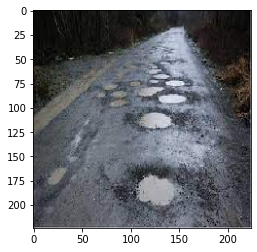

1/1 [==============================] - 0s 164ms/step
Detected Pothole/s


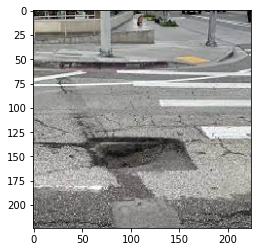

1/1 [==============================] - 0s 71ms/step
Detected Pothole/s


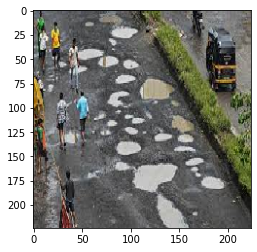

1/1 [==============================] - 0s 56ms/step
Detected Pothole/s


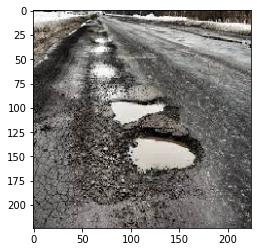

1/1 [==============================] - 0s 49ms/step
Detected Pothole/s


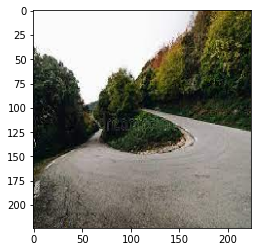

1/1 [==============================] - 0s 50ms/step
Didn't detect Pothole/s


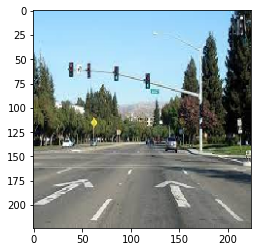

1/1 [==============================] - 0s 52ms/step
Didn't detect Pothole/s


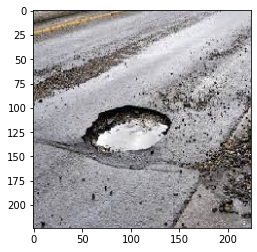

1/1 [==============================] - 0s 59ms/step
Detected Pothole/s


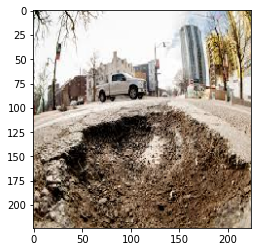

1/1 [==============================] - 0s 50ms/step
Detected Pothole/s


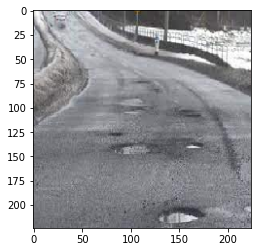

1/1 [==============================] - 0s 54ms/step
Detected Pothole/s


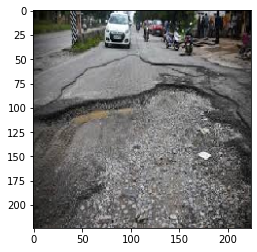

1/1 [==============================] - 0s 65ms/step
Detected Pothole/s


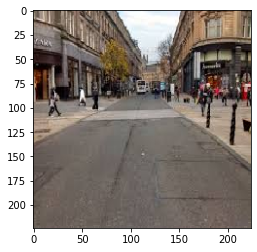

1/1 [==============================] - 0s 43ms/step
Didn't detect Pothole/s


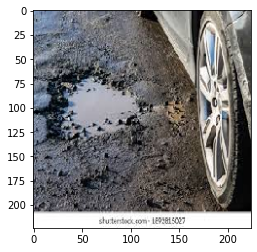

1/1 [==============================] - 0s 57ms/step
Detected Pothole/s


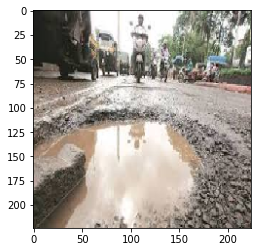

1/1 [==============================] - 0s 54ms/step
Detected Pothole/s


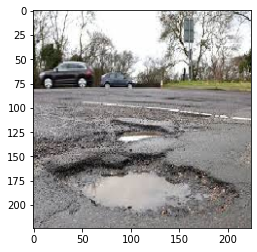

1/1 [==============================] - 0s 66ms/step
Detected Pothole/s


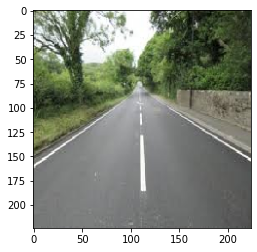

1/1 [==============================] - 0s 80ms/step
Didn't detect Pothole/s


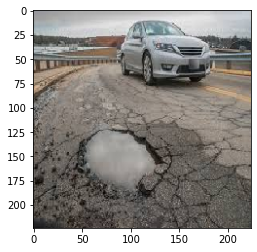

1/1 [==============================] - 0s 49ms/step
Detected Pothole/s


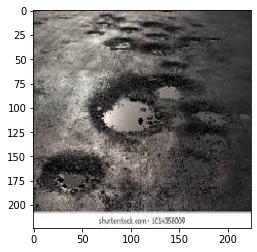

1/1 [==============================] - 0s 49ms/step
Detected Pothole/s


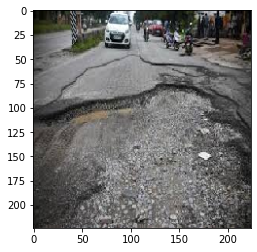

1/1 [==============================] - 0s 44ms/step
Detected Pothole/s


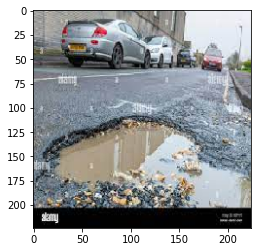

1/1 [==============================] - 0s 56ms/step
Detected Pothole/s


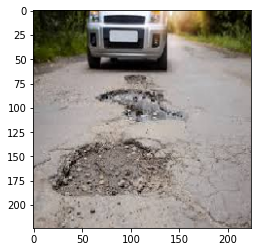

1/1 [==============================] - 0s 55ms/step
Detected Pothole/s


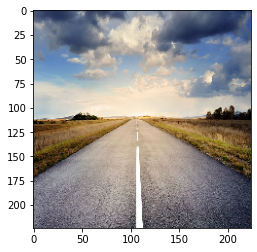

1/1 [==============================] - 0s 49ms/step
Didn't detect Pothole/s


In [19]:
import numpy as np
import os
from matplotlib import pyplot as plt
path = "C:/Users/alans/OneDrive/Desktop/Sem6/ECE3502/J component/dataset"
for i in os.listdir(path):
    img = image.load_img(path + '/' + i, target_size = (224,224))
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0) / 255
    classes = model_pothole.predict(x)
    pothole_flag = detect("Pothole/s",np.argmax(classes[0]) == 0 )
    print(pothole_flag)

In [15]:
import cv2

video_path = "C:/Users/alans/Downloads/DASH CAM 2016 01 29 (42 Miles of Potholes).mp4"
output_folder = "C:/Users/alans/OneDrive/Desktop/Sem6/ECE3502/J component/video_output"
frame_rate = 30 # the number of frames to extract per second

cap = cv2.VideoCapture(video_path)
count = 0

while cap.isOpened():
    ret, frame = cap.read()
    
    if not ret:
        break
        
    if count % frame_rate == 0:
        file_name = output_folder + "/frame{:d}.jpg".format(count)
        cv2.imwrite(file_name, frame)
        
    count += 1
    
cap.release()

In [2]:
import csv

with open('details_pothole.csv',mode='w') as csvfile:
    fieldnames = ['Location','Vehicle Speed','Time Spent','Severity(High?)']
    
    location = ["16 15' 56\"","46 18' 76\"","12 134' 34\"","17 101' 56\"","45 53' 30\"","65 10' 11\"","01 28' 5\"","75 34' 6\""]
    speed = [7,3,20,7,6,15,2,18]
    time = [23,46,2,25,32,4,50,4]

    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()

    for i in range(8):
        if time[i] > 20:
            writer.writerow({"Location":location[i],"Vehicle Speed":speed[i],"Time Spent":time[i],'Severity(High?)':1})
        else:
            writer.writerow({"Location":location[i],"Vehicle Speed":speed[i],"Time Spent":time[i],'Severity(High?)':0})
    # writer.writerow({"Location":"46 18' 76\"","Vehicle Speed":3,"Time Spent":46,'Severity(High?)':1})
    # writer.writerow({"Location":"12 134' 34\"","Vehicle Speed":20,"Time Spent":2,'Severity(High?)':0})
    # writer.writerow({"Location":"17 101' 56\"","Vehicle Speed":7,"Time Spent":25,'Severity(High?)':1})
    # writer.writerow({"Location":"45 53' 30\"","Vehicle Speed":6,"Time Spent":32,'Severity(High?)':1})
    # writer.writerow({"Location":"65 10' 11\"","Vehicle Speed":15,"Time Spent":4,'Severity(High?)':0})
    # writer.writerow({"Location":"01 28' 5\"","Vehicle Speed":2,"Time Spent":50,'Severity(High?)':1})
    # writer.writerow({"Location":"75 34' 6\"","Vehicle Speed":18,"Time Spent":4,'Severity(High?)':0})

FOR THE AUTHORITIES:

In [3]:
import numpy
import pandas as pd
from sklearn import linear_model

df = pd.read_csv('pothole_exported.csv')
print(df)

       Location  Vehicle Speed  Time Spent  Severity(High?)
0   16 15' 56""              7          23                1
1   46 18' 76""              3          46                1
2  12 134' 34""             20           2                0
3  17 101' 56""              7          25                1
4   45 53' 30""              6          32                1
5   65 10' 11""             15           4                0
6    01 28' 5""              2          50                1
7    75 34' 6""             18           4                0


In [4]:
X = numpy.array(df["Time Spent"]).reshape(-1,1)
y = df["Severity(High?)"]

In [5]:
logr = linear_model.LogisticRegression()
logr.fit(X,y)

LogisticRegression()

In [6]:
predicted = logr.predict(numpy.array([23]).reshape(-1,1))

if(predicted == 1):
    print("Pothole to be fixed as soon as possible!")
else:
    print("Pothole severity low. Proceed to next pothole!")

Pothole to be fixed as soon as possible!
